In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

# Dataset info

In [2]:
# Dimension reduction using PCA
# پروژه کاهش بعد و حذف فیچر های اضافه روی دیتاست تصویر اعداد سایکیت لرن

# هدف این است که ویژگی‌های غیرضروری رو حذف کنیم ولی همچنان اطلاعات مهم رو حفظ کنیم

digits = load_digits()
# Dataset info | اطلاعات دیتاست
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [3]:
# Show the label of the 501st sample
# لیبل ها
# میخوایم ببینیم عدد نمونه 501ام چند بوده
# تارگت اینجا به معنی همون لیبل هست
digits.target[500]

np.int64(8)

In [4]:
# Show the features of the 501st sample
# ویژگی ها یا همون فیچر ها
# میخوایم فیچر های نمونه 501ام رو ببینیم
# دیتا اینجا به معنی همون فیچر هست
digits.data[500]

array([ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.,  0.,  8., 16., 11., 10.,
       13.,  0.,  0.,  0.,  7., 14.,  0.,  1., 15.,  2.,  0.,  0.,  2.,
       16.,  9., 16., 16.,  1.,  0.,  0.,  0., 12., 16., 15., 15.,  2.,
        0.,  0.,  0., 12., 10.,  0.,  8.,  8.,  0.,  0.,  0.,  9., 12.,
        4.,  7., 12.,  0.,  0.,  0.,  2., 11., 16., 16.,  9.,  0.])

In [5]:
# نمایش فیچر های نمونه 501ام به صورت ماتریس 8 در 8
# Display the 8x8 image matrix of the 501st sample

digits.images[500]

array([[ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.],
       [ 0.,  8., 16., 11., 10., 13.,  0.,  0.],
       [ 0.,  7., 14.,  0.,  1., 15.,  2.,  0.],
       [ 0.,  2., 16.,  9., 16., 16.,  1.,  0.],
       [ 0.,  0., 12., 16., 15., 15.,  2.,  0.],
       [ 0.,  0., 12., 10.,  0.,  8.,  8.,  0.],
       [ 0.,  0.,  9., 12.,  4.,  7., 12.,  0.],
       [ 0.,  0.,  2., 11., 16., 16.,  9.,  0.]])

8


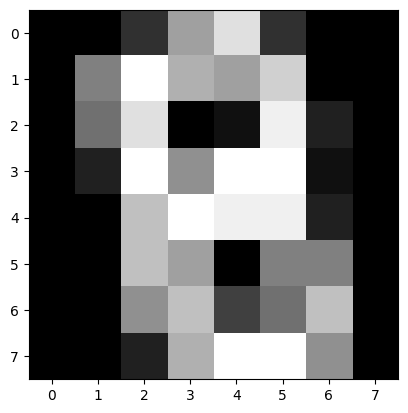

In [6]:
# نمایش تصویر نمونه 501ام همراه با برچسبش
# Visualize the 501st sample image with its label

x = digits.images[500] # انتخاب تصویر نمونه ۵۰۱ام

print(digits.target[500]) # نمایش لیبل این نمونه

plt.gray() # تنظیم نقشه رنگی به سیاه و سفید
plt.imshow(x) # نمایش تصویر

plt.show() # نمایش خروجی

# Pre-processing

In [7]:
# تقسیم مجموعه داده به مجموعه‌های ترین (80%) و تست (20%)
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

print(f"features => train: {X_train.shape} - test: {X_test.shape}")
print(f"labels => train: {y_train.shape} - test: {y_test.shape}")

features => train: (1437, 64) - test: (360, 64)
labels => train: (1437,) - test: (360,)


In [8]:
# نرمال‌سازی داده‌های ویژگی به محدوده بین 0 و 1
# Normalize the feature data to a range between 0 and 1

scalar = MinMaxScaler(feature_range=(0, 1)) # همه مقادیر بین 0 و 1 قرار میگیرن

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test) # اینجا از فیت ترنسفرم استفاده نمیکنیم چون مدل نباید داده های تست رو یاد بگیره

# PCA

In [9]:
# کاهش فیچر های نمونه ها از 64 تا به 32 تا

pca = PCA(n_components=32) # کاهش ابعاد به 32 ویژگی اصلی

# انجام عملیات کاهش ابعاد به 3 ویژگی اصلی
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Performance metric

In [10]:
# تعریف تابع برای محاسبه ی معیارهای ارزیابی
# Define a function to calculate and print accuracy, precision, and recall metrics

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test, average='macro') # توی دسته بندی چند کلاسه نیازه که مشخص کنیم در نهایت مقدار نهایی چجوری محاسبه بشه 

    r = recall_score(y_true=y_test, y_pred=y_pred_test, average='macro')

    print(f"acc train : {acc_train} - acc test : {acc_test} - precision : {p} - recall : {r}")

    return acc_train, acc_test, p, r

# Classification

1. Random Forest

In [11]:
# الگوریتم رندوم فارست
# Create and fit the model

rf = RandomForestClassifier(max_depth=128, n_estimators=256)
rf.fit(X_train, y_train)

# Calculating accuracy, precision, and recall
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train : 1.0 - acc test : 0.9833333333333333 - precision : 0.9823809523809525 - recall : 0.9844927536231884


2. SVM

In [12]:
# الگوریتم اس وی ام
# Create and fit the model

svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

# Calculating accuracy, precision, and recall
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train : 0.9979123173277662 - acc test : 0.9888888888888889 - precision : 0.9884528162169668 - recall : 0.9903488372093022


3. ANN

In [13]:
# الگوریتم شبکه عصبی مصنوعی
# Create and fit the model

ann = MLPClassifier(hidden_layer_sizes=256, batch_size=64, solver='adam', learning_rate='adaptive')
ann.fit(X_train, y_train)

# Calculating accuracy, precision, and recall
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train : 1.0 - acc test : 0.9805555555555555 - precision : 0.9789901732017672 - recall : 0.9813338388945063


4. KNN

In [14]:
# الگوریتم رندوم فارست
# Create and fit the model

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn. predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train : 0.988169798190675 - acc test : 0.9861111111111112 - precision : 0.9870503546947234 - recall : 0.9842600574712643


# Model Comparison

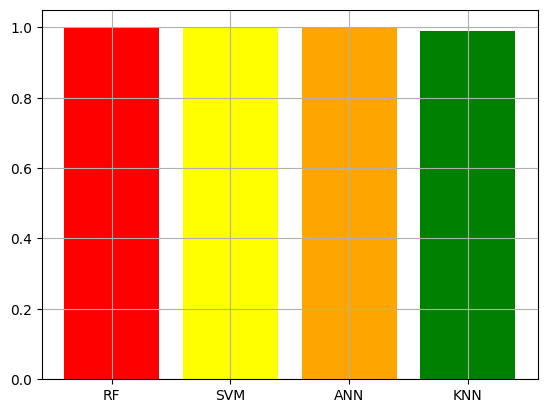

In [15]:
# مقایسه همه مدل ها با هم

# Compare train acuracy of all models
# مقایسه اکیورسی داده های ترین مدل‌ ها

title = ["RF", 'SVM', 'ANN', 'KNN']
acc_train = [acc_train_rf, acc_train_svm, acc_train_ann, acc_train_knn]
colors = ['red', 'yellow', 'orange', 'green']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

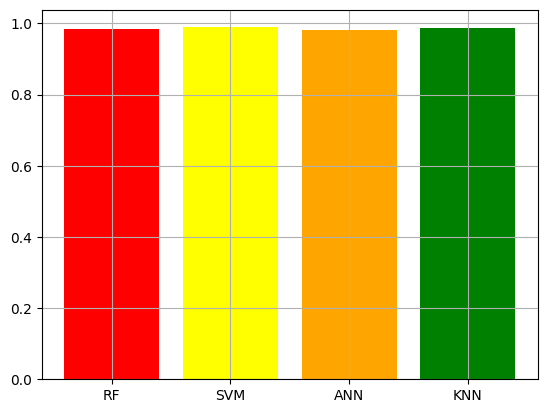

In [16]:
# Compare test acuracy of all models
# مقایسه اکیورسی داده های تست مدل‌ ها

title = ["RF", 'SVM', 'ANN', 'KNN']
acc_test = [acc_test_rf, acc_test_svm, acc_test_ann, acc_test_knn]
colors = ['red', 'yellow', 'orange', 'green']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

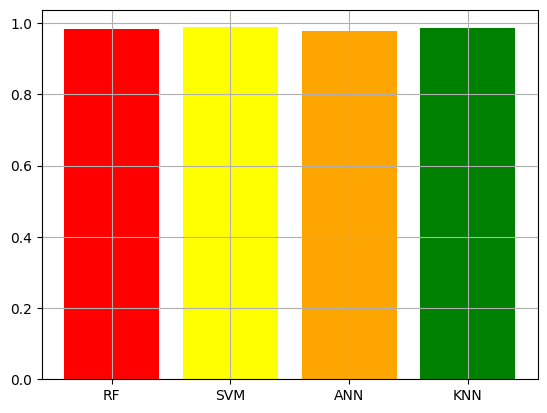

In [17]:
# Compare test precision of all models
# مقایسه پریسیژن مدل‌ ها

title = ["RF", 'SVM', 'ANN', 'KNN']
p = [p_rf, p_svm, p_ann, p_knn]
colors = ['red', 'yellow', 'orange', 'green']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

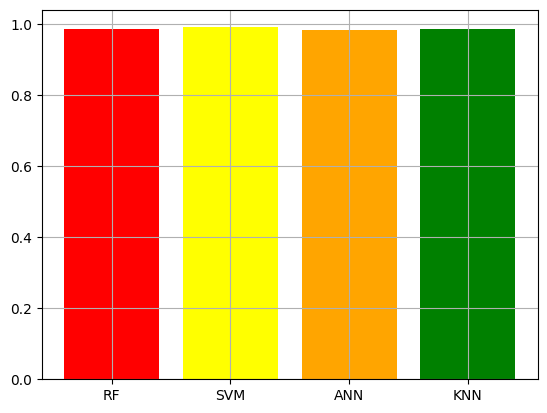

In [18]:
# Compare test recall of all models
# مقایسه ریکال مدل‌ها

title = ['RF', 'SVM', 'ANN', 'KNN']
r = [r_rf, r_svm, r_ann, r_knn]
colors = ['red', 'yellow', 'orange', 'green']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()